In [1]:
import zipfile
import os

# Define file paths
zip_path = 'data/reaction_time_data.zip' # If you've put your file in the same directory as the notebook you're working in, your path is just the file name. If not, you'll need to include the path to the file.
extract_path = 'data' # This will extract the files to the current directory

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [2]:
import pandas as pd
import glob
import os

# Path to the directory containing extracted .csv files
csv_files = glob.glob(os.path.join(extract_path, '*.csv'))

# Initialize an empty list to store DataFrames
dfs = []

# Loop through and read each csv file
for idx, file in enumerate(csv_files):
    data = pd.read_csv(file)

    # Extract relevant rows and columns
    # Filter rows where 'trial_type' is 'response' (indicating a reaction time trial)
    data = data[data['trial_type'] == 'image-keyboard-response']

    # Select and rename relevant columns
    df = data[['rt', 'stimulus', 'response', 'correct']].copy()
    df.rename(columns={
        'rt': 'reaction_time',
        'stimulus': 'circle_color',
        'response': 'key_pressed',
        'correct': 'accuracy'
    }, inplace=True)

    # Clean up 'circle_color' to extract only color names
    df['circle_color'] = df['circle_color'].str.extract(r'images/(\w+).png')[0]

    # Add subject_id column
    df['subject_id'] = idx + 1

    # Reorder columns to make 'subject_id' the first column
    df = df[['subject_id', 'reaction_time', 'circle_color', 'key_pressed', 'accuracy']]

    # Append the processed DataFrame
    dfs.append(df)

# Concatenate all DataFrames
all_data = pd.concat(dfs, ignore_index=True)


In [3]:
all_data.head()

,subject_id,reaction_time,circle_color,key_pressed,accuracy
0,1,422.0,orange,j,True
1,1,340.0,blue,f,True
2,1,303.0,blue,f,True
3,1,412.0,orange,j,True
4,1,350.0,blue,j,False


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming all_data is already loaded
# If you do not have it yet, go back to Step 21 and load it as instructed
# all_data = pd.read_csv('reaction_time_data.csv')  # Replace with actual file path

# Create datasets for the two groups
orange_reactiontime_df = all_data[all_data['circle_color'] == 'orange']['reaction_time']
blue_reactiontime_df = all_data[all_data['circle_color'] == 'blue']['reaction_time']

# Preview the datasets
print("Orange Reaction Times:\n", orange_reactiontime_df.head())
print("Blue Reaction Times:\n", blue_reactiontime_df.head())


Orange Reaction Times:
 0    422.0
3    412.0
5    462.0
7    323.0
8    389.0
Name: reaction_time, dtype: float64
Blue Reaction Times:
 1    340.0
2    303.0
4    350.0
6    315.0
9    289.0
Name: reaction_time, dtype: float64


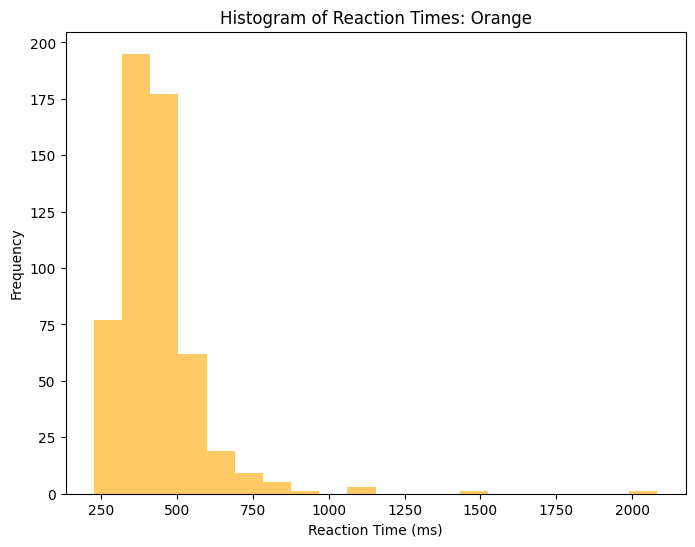

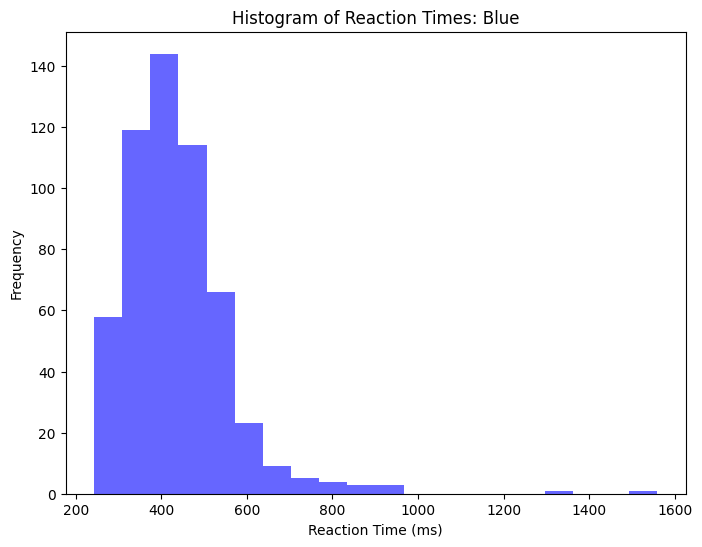

In [6]:
# Orange Reaction Time Histogram
plt.figure(figsize=(8, 6))
plt.hist(orange_reactiontime_df, bins=20, color='orange', alpha=0.6, label='Orange')
plt.title('Histogram of Reaction Times: Orange')
plt.xlabel('Reaction Time (ms)')
plt.ylabel('Frequency')
plt.show()

# Blue Reaction Time Histogram
plt.figure(figsize=(8, 6))
plt.hist(blue_reactiontime_df, bins=20, color='blue', alpha=0.6, label='Blue')
plt.title('Histogram of Reaction Times: Blue')
plt.xlabel('Reaction Time (ms)')
plt.ylabel('Frequency')
plt.show()


In [7]:
from ipywidgets import interact

@interact(alpha=(0, 1, 0.05))
def plot_histogram(alpha=0.6):
    plt.figure(figsize=(8, 6))
    plt.hist(orange_reactiontime_df, bins=20, color='orange', alpha=alpha, label='Orange')
    plt.title('Histogram of Reaction Times: Orange')
    plt.xlabel('Reaction Time (ms)')
    plt.ylabel('Frequency')
    plt.show()


interactive(children=(FloatSlider(value=0.6, description='alpha', max=1.0, step=0.05), Output()), _dom_classes…

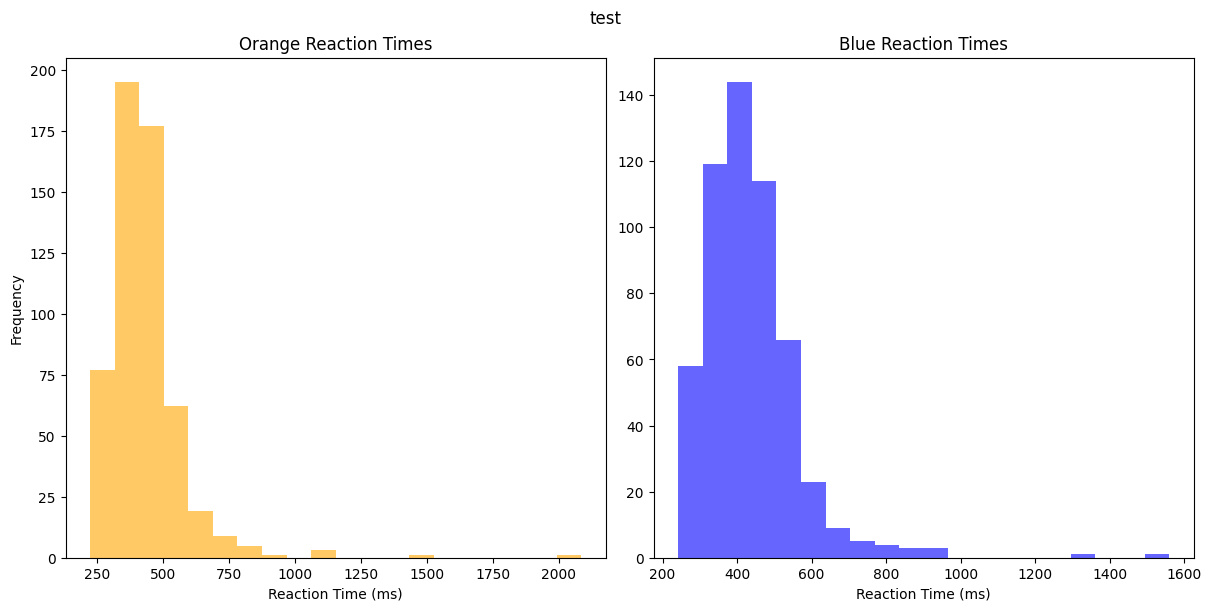

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

# Panel 1: Orange
axs[0].hist(orange_reactiontime_df, bins=20, color='orange', alpha=0.6, label='Orange')
axs[0].set_title('Orange Reaction Times')
axs[0].set_xlabel('Reaction Time (ms)')
axs[0].set_ylabel('Frequency')

# Panel 2: Blue
axs[1].hist(blue_reactiontime_df, bins=20, color='blue', alpha=0.6, label='Blue')
axs[1].set_title('Blue Reaction Times')
axs[1].set_xlabel('Reaction Time (ms)')

plt.suptitle('Reaction Times by Circle Color')

fig.suptitle("test")

plt.show()



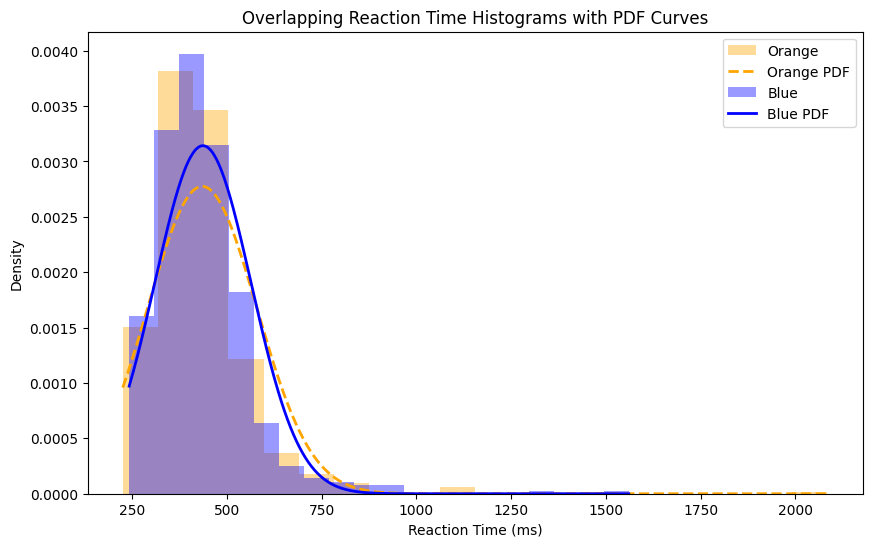

In [ ]:
plt.figure(figsize=(10, 6))

# Orange Histogram and Curve
plt.hist(orange_reactiontime_df, bins=20, color='orange', alpha=0.4, label='Orange', density=True)
plt.plot(
    np.linspace(orange_reactiontime_df.min(), orange_reactiontime_df.max(), 500),
    norm.pdf(
        np.linspace(orange_reactiontime_df.min(), orange_reactiontime_df.max(), 500),
        np.mean(orange_reactiontime_df),
        np.std(orange_reactiontime_df),
    ),
    color='orange',
    linestyle='--',
    linewidth=2,
    label='Orange PDF',
)

# Blue Histogram and Curve
plt.hist(blue_reactiontime_df, bins=20, color='blue', alpha=0.4, label='Blue', density=True)
plt.plot(
    np.linspace(blue_reactiontime_df.min(), blue_reactiontime_df.max(), 500),
    norm.pdf(
        np.linspace(blue_reactiontime_df.min(), blue_reactiontime_df.max(), 500),
        np.mean(blue_reactiontime_df),
        np.std(blue_reactiontime_df),
    ),
    color='blue',
    linestyle='-',
    linewidth=2,
    label='Blue PDF',
)

plt.title('Overlapping Reaction Time Histograms with PDF Curves')
plt.xlabel('Reaction Time (ms)')
plt.ylabel('Density')
plt.legend()
plt.show()



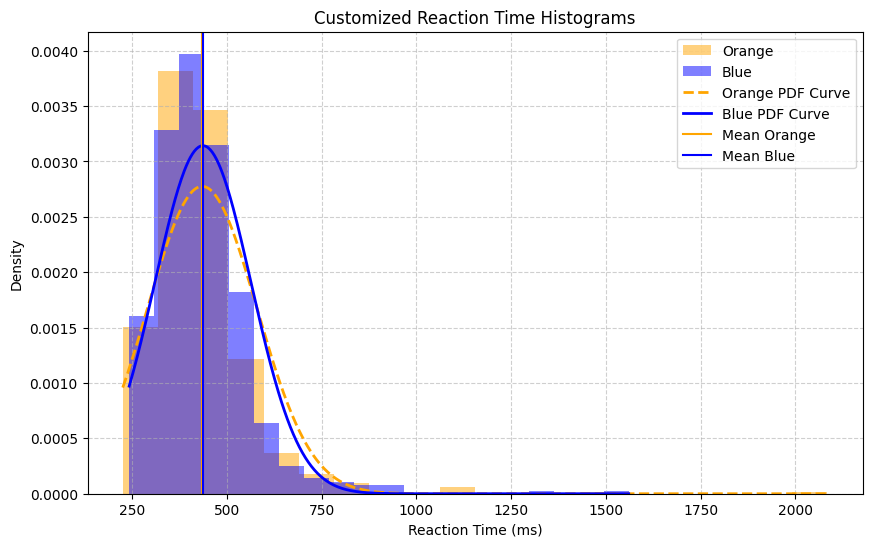

In [15]:
plt.figure(figsize=(10, 6))

# Histograms
plt.hist(orange_reactiontime_df, bins=20, color='orange', alpha=0.5, label='Orange', density=True)
plt.hist(blue_reactiontime_df, bins=20, color='blue', alpha=0.5, label='Blue', density=True)

# PDFs
plt.plot(
    np.linspace(orange_reactiontime_df.min(), orange_reactiontime_df.max(), 500),
    norm.pdf(
        np.linspace(orange_reactiontime_df.min(), orange_reactiontime_df.max(), 500),
        np.mean(orange_reactiontime_df),
        np.std(orange_reactiontime_df),
    ),
    color='orange',
    linestyle='--',
    linewidth=2,
    label='Orange PDF Curve',
)
plt.plot(
    np.linspace(blue_reactiontime_df.min(), blue_reactiontime_df.max(), 500),
    norm.pdf(
        np.linspace(blue_reactiontime_df.min(), blue_reactiontime_df.max(), 500),
        np.mean(blue_reactiontime_df),
        np.std(blue_reactiontime_df),
    ),
    color='blue',
    linestyle='-',
    linewidth=2,
    label='Blue PDF Curve',
)

# Customizations
plt.title('Customized Reaction Time Histograms')
plt.xlabel('Reaction Time (ms)')
plt.ylabel('Density')
plt.grid(visible=True, which='both', linestyle='--', alpha=0.6)
plt.axvline(np.mean(orange_reactiontime_df), color='orange', linestyle='-', label='Mean Orange')
plt.axvline(np.mean(blue_reactiontime_df), color='blue', linestyle='-', label='Mean Blue')
plt.legend(loc='upper right', frameon=True, fontsize=10)

plt.show()


In [24]:
# Define bin size
bin_size = 50  # for example, 50 ms

# Calculate bin edges
orange_bins = np.arange(min(orange_reactiontime_df), max(orange_reactiontime_df) + bin_size, bin_size)
blue_bins = np.arange(min(blue_reactiontime_df), max(blue_reactiontime_df) + bin_size, bin_size)


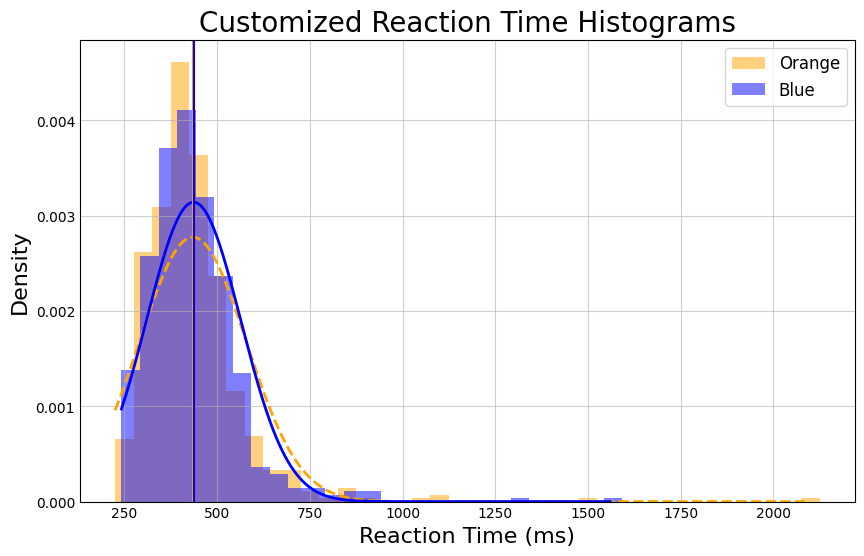

In [25]:
plt.figure(figsize=(10, 6))

# Histograms
plt.hist(orange_reactiontime_df, bins=orange_bins, color='orange', alpha=0.5, label='Orange', density=True)
plt.hist(blue_reactiontime_df, bins=blue_bins, color='blue', alpha=0.5, label='Blue', density=True)

# PDFs
plt.plot(
    np.linspace(orange_reactiontime_df.min(), orange_reactiontime_df.max(), 500),
    norm.pdf(
        np.linspace(orange_reactiontime_df.min(), orange_reactiontime_df.max(), 500),
        np.mean(orange_reactiontime_df),
        np.std(orange_reactiontime_df),
    ),
    color='orange',
    linestyle='--',
    linewidth=2,
    # remove unnecessary legend label; orange = color orange, blue = blue.
)
plt.plot(
    np.linspace(blue_reactiontime_df.min(), blue_reactiontime_df.max(), 500),
    norm.pdf(
        np.linspace(blue_reactiontime_df.min(), blue_reactiontime_df.max(), 500),
        np.mean(blue_reactiontime_df),
        np.std(blue_reactiontime_df),
    ),
    color='blue',
    linestyle='-',
    linewidth=2,
)

# Customizations
plt.title('Customized Reaction Time Histograms', fontsize=20)
plt.xlabel('Reaction Time (ms)', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.grid(visible=True, which='both', linestyle='-', alpha=0.6) # Change linestyle to '-'
plt.axvline(np.mean(orange_reactiontime_df), color='orange', linestyle='-')
plt.axvline(np.mean(blue_reactiontime_df), color='blue', linestyle='-')

# Clean up the legend
plt.legend(loc='upper right', frameon=True, fontsize=12) # Increase font size
plt.tick_params(axis='both', which='both', length=0) # Hide tick marks on the edge

plt.show()
